<a href="https://colab.research.google.com/github/mseyfi/DeepLearning/blob/master/multi_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Multi class Classification CNN (logestic Regression)

import numpy as np
import matplotlib.pyplot as plt
import cv2
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Model

In [40]:
fmnist = tf.keras.datasets.fashion_mnist

# load the mnist data
(X_train, Y_train),(X_test, Y_test) = fmnist.load_data()

# normalize data 
X_train, X_test = X_train / 255.0, X_test / 255.0

print(X_train.shape)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape, Y_train.shape)


(60000, 28, 28)
(60000, 28, 28, 1) (60000,)


In [0]:

# create the model

i = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(i)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.AveragePooling2D(pool_size= 2)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.AveragePooling2D(pool_size= 2)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.AveragePooling2D(pool_size= 2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Dropout(.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# create the model 
model = Model(i, x)

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [0]:
# Alternatively we can use

# create the model

i = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3),strides=2, activation='relu')(i)
x = tf.keras.layers.Conv2D(64, (3, 3),strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3),strides=2, activation='relu')(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Dropout(.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# create the model 
model_sub = Model(i, x)

# compile the model
model_sub.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 


In [44]:
# train the model
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 3)



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.4559 - accuracy: 0.8289 - val_loss: 0.3585 - val_accuracy: 0.8692
Epoch 2/3
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.3172 - accuracy: 0.8819 - val_loss: 0.3268 - val_accuracy: 0.8802
Epoch 3/3
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.2715 - accuracy: 0.8995 - val_loss: 0.2862 - val_accuracy: 0.8922


60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

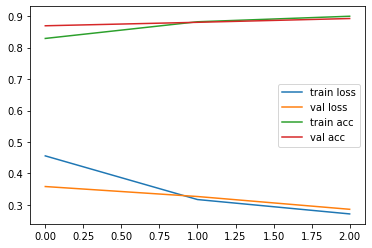

In [45]:
# print the training results
print('Train loss {:.2f} acc {:.2f}'.format(model.evaluate(X_train, Y_train)[0], model.evaluate(X_train, Y_train)[1]))
print('Test: loss {:.2f} acc {:.2f}'.format(model.evaluate(X_test, Y_test)[0], model.evaluate(X_test, Y_test)[1]))

plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')


plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
